In [1]:
%autosave 30
%load_ext autoreload
%autoreload 2

Autosaving every 30 seconds


In [2]:
cd ..

/home/huawei123/kwx1991442/code-classification


In [524]:
import argparse
import logging
import time
import os
import numpy as np

from src.params import *
from src.baseline.dataloader import BaselineDataset

logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

def parse_args():
    parser = argparse.ArgumentParser(
        formatter_class=argparse.ArgumentDefaultsHelpFormatter
    )
    parser.add_argument("--exp-name", type=str, default=EXPERIMENT_NAME,
        help="the name of this experiment")
    parser.add_argument("--method", type=str, choices=METHOD_CHOICES, default=METHOD,
        help="select method of classification")
    parser.add_argument("--seed", type=int, default=SEED, 
        help="seed of the experiment")
    parser.add_argument("--traintestsplit", type=float, default=0.7, 
        help="seed of the experiment")
    parser.add_argument("--mode", type=str, choices=MODE_CHOICES, default=MODE,
        help="eval mode is used to measure accuracy, predict mode to get prediction")
    parser.add_argument("--liblinear-params", type=str, default=LIBLINEAR_PARAMS,
        help="params of LIBLINEAR classifier")
    
    parser.add_argument('--save-model', action='store_true', 
        help="use this flag to save the model")
    parser.add_argument('--save-predictions', action='store_true', 
        help="use this flag to save predictions")
    parser.add_argument('--save-metrics', action='store_true', 
        help="use this flag to save metrics")

    args = parser.parse_args("")
    return args

In [7]:
args = parse_args()

np.random.seed(args.seed)

run_name = f"{args.exp_name}_{args.method}_{args.seed}_{int(time.time())}"
logging.info(f"{run_name=}")

data = BaselineDataset()
logging.info(f"{len(data.vocab)=}")
logging.info(f"Dataset is setup!")

y_train, x_train, y_val, x_val = data.get_input_train_val(args.traintestsplit)
logging.info(f"Data in splitted to train {len(y_train)=} and val {len(y_val)=}.")

2023-08-11 19:05:46,540 - root - INFO - run_name='TEST_baseline_42_1691769946'
100%|██████████| 11327/11327 [00:16<00:00, 705.21it/s]
2023-08-11 19:06:21,112 - root - INFO - len(data.vocab)=1306462
2023-08-11 19:06:21,113 - root - INFO - Dataset is setup!
100%|██████████| 11327/11327 [00:21<00:00, 537.62it/s]
2023-08-11 19:06:42,184 - root - INFO - Data in splitted to train len(y_train)=8025 and val len(y_val)=3302.


In [187]:
# Python program to generate word vectors using Word2Vec
 
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec

In [188]:
# !wget https://www.gutenberg.org/files/11/11-0.txt

In [189]:
#  Reads ‘alice.txt’ file
sample = open("/home/huawei123/kwx1991442/code-classification/notebooks/11-0.txt")
s = sample.read()
 
# Replaces escape character with space
f = s.replace("\n", " ")

In [191]:
f[:1000] #.split('.')

'\ufeffThe Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: Alice’s Adventures in Wonderland  Author: Lewis Carroll  Release Date: January, 1991 [eBook #11] [Most recently updated: October 12, 2020]  Language: English  Character set encoding: UTF-8  Produced by: Arthur DiBianca and David Widger  *** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***  [Illustration]     Alice’s Adventures in Wonderland  by Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0  Contents   CHAPTER I.     Down the R

In [249]:
# data = []
 
# # iterate through each sentence(?) in the file
# for i in sent_tokenize(f):
#     temp = []
     
#     # tokenize the sentence into words
#     for j in word_tokenize(i):
#         temp.append(j.lower())
 
#     data.append(temp)

from nltk import ToktokTokenizer

tokenizer = ToktokTokenizer()

data = tokenizer.tokenize(f.lower())

In [251]:
len(set(data))

3907

In [252]:
data = [sentence.split(' ') for sentence in ' '.join(data).split(".")]

In [262]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1,
                              vector_size = 100, window = 5)
# model1.build_vocab(data)  # prepare the model vocabulary
# model1.train(data, total_examples=model1.corpus_count, epochs=model1.epochs)  # train word vectors

2023-08-14 15:26:50,815 - gensim.models.word2vec - INFO - collecting all words and their counts
2023-08-14 15:26:50,816 - gensim.models.word2vec - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-08-14 15:26:50,820 - gensim.models.word2vec - INFO - collected 3444 word types from a corpus of 37606 raw words and 1223 sentences
2023-08-14 15:26:50,821 - gensim.models.word2vec - INFO - Creating a fresh vocabulary
2023-08-14 15:26:50,829 - gensim.utils - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 3444 unique words (100.00% of original 3444, drops 0)', 'datetime': '2023-08-14T15:26:50.829611', 'gensim': '4.3.1', 'python': '3.8.10 (default, May 26 2023, 14:05:08) \n[GCC 9.4.0]', 'platform': 'Linux-5.15.0-46-generic-x86_64-with-glibc2.29', 'event': 'prepare_vocab'}
2023-08-14 15:26:50,830 - gensim.utils - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 37606 word corpus (100.00% of original 37606, drops 0)', 'dateti

In [263]:
model1.__dict__.keys()

dict_keys(['vector_size', 'workers', 'epochs', 'train_count', 'total_train_time', 'batch_words', 'sg', 'alpha', 'min_alpha', 'window', 'shrink_windows', 'random', 'hs', 'negative', 'ns_exponent', 'cbow_mean', 'compute_loss', 'running_training_loss', 'min_alpha_yet_reached', 'corpus_count', 'corpus_total_words', 'max_final_vocab', 'max_vocab_size', 'min_count', 'sample', 'sorted_vocab', 'null_word', 'cum_table', 'raw_vocab', 'wv', 'hashfxn', 'seed', 'layer1_size', 'comment', 'load', 'effective_min_count', 'lifecycle_events', 'syn1neg'])

In [264]:
# print(data[:1000])

In [265]:
# model1.random
# model1.wv.similarity('Alice', 'wonder')
# model1.wv.most_similar_cosmul()
# model1.wv.similar_by_word('she')
# model1.wv.similar_by_word('alice')
model1.wv.similar_by_word('wonderland')

[('before', 0.9966993927955627),
 ('than', 0.9966861605644226),
 ('some', 0.9966830611228943),
 ('about', 0.9965919852256775),
 ('their', 0.9965327382087708),
 ('1', 0.9964833855628967),
 ('very', 0.9964804649353027),
 ('what', 0.9964601993560791),
 ('an', 0.9964577555656433),
 ('have', 0.9964552521705627)]

In [266]:
model1.wv.get_vector('wonderland')

array([-0.04132657,  0.05006908, -0.02915147,  0.02068921,  0.04196997,
       -0.16418053,  0.04597991,  0.18442625, -0.12844913, -0.07454689,
       -0.04283495, -0.14821553,  0.00697514,  0.0956407 ,  0.02566837,
       -0.04402883,  0.00398872, -0.07403257,  0.00034081, -0.17744362,
        0.1172182 ,  0.03085283,  0.03603613, -0.02725579, -0.00242646,
       -0.04047075, -0.05236578, -0.06218967, -0.06537906, -0.00719648,
        0.14690952, -0.00749544,  0.02092831, -0.060789  , -0.04977383,
        0.11967191,  0.04930425, -0.02407078, -0.06054141, -0.15615226,
       -0.00109629, -0.09399893, -0.04916599,  0.03780069,  0.08104823,
       -0.00599413, -0.09011382, -0.00321638,  0.05192882,  0.11599217,
        0.04413547, -0.00811334, -0.05603509,  0.01964811,  0.01207181,
        0.01724535,  0.00056252, -0.04401404, -0.09853489,  0.02153739,
       -0.02238471,  0.00050785,  0.02943429, -0.00668984, -0.11972158,
        0.11053466, -0.00343486,  0.08818015, -0.12184811,  0.13

In [275]:
model1.wv.get_mean_vector(['alice', 'wonderland'])

array([-0.0566986 ,  0.07058919, -0.03284445,  0.02234017,  0.0533099 ,
       -0.22731194,  0.0612147 ,  0.24691656, -0.16553822, -0.10277808,
       -0.05211716, -0.20628321, -0.00043565,  0.13537277,  0.03960071,
       -0.06368199,  0.00031325, -0.10439325,  0.00470385, -0.24469471,
        0.1548306 ,  0.03668876,  0.04814726, -0.03247205, -0.0099903 ,
       -0.0475182 , -0.06769177, -0.07949942, -0.08940132, -0.00603034,
        0.19929838, -0.01617719,  0.03476644, -0.07368007, -0.06621359,
        0.1565375 ,  0.06955002, -0.03328809, -0.08080624, -0.20067191,
       -0.00496908, -0.12593523, -0.06699365,  0.04934294,  0.108271  ,
       -0.00130986, -0.11533882, -0.00395439,  0.06363016,  0.15682492,
        0.0510326 , -0.01762117, -0.07821724,  0.02141594,  0.01136262,
        0.02589963,  0.00554658, -0.05943388, -0.13074976,  0.03085929,
       -0.03104444, -0.003106  ,  0.03432199, -0.00368448, -0.15768535,
        0.14147326, -0.00754428,  0.12139203, -0.15771008,  0.16

In [267]:
model1.wv.get_normed_vectors().shape
# model1.wv.most_similar_to_given('alice', ['she', 'wonderland', 'machines'])

(3444, 100)

In [268]:
# Print results
print("Cosine similarity between 'she' " +
               "and 'alice' - CBOW : ",
    model1.wv.similarity('she', 'alice'))
     
print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))


Cosine similarity between 'she' and 'alice' - CBOW :  0.99955153
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9460927


In [269]:
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
                                             window = 5, sg = 1)
 
# Print results
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ",
    model2.wv.similarity('alice', 'wonderland'))
     
print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ",
      model2.wv.similarity('alice', 'machines'))

2023-08-14 15:27:01,793 - gensim.models.word2vec - INFO - collecting all words and their counts
2023-08-14 15:27:01,794 - gensim.models.word2vec - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-08-14 15:27:01,798 - gensim.models.word2vec - INFO - collected 3444 word types from a corpus of 37606 raw words and 1223 sentences
2023-08-14 15:27:01,799 - gensim.models.word2vec - INFO - Creating a fresh vocabulary
2023-08-14 15:27:01,806 - gensim.utils - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 3444 unique words (100.00% of original 3444, drops 0)', 'datetime': '2023-08-14T15:27:01.806551', 'gensim': '4.3.1', 'python': '3.8.10 (default, May 26 2023, 14:05:08) \n[GCC 9.4.0]', 'platform': 'Linux-5.15.0-46-generic-x86_64-with-glibc2.29', 'event': 'prepare_vocab'}
2023-08-14 15:27:01,807 - gensim.utils - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 37606 word corpus (100.00% of original 37606, drops 0)', 'dateti

Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.8142955
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.82334894


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv('movie_reviews.csv')
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

# Preprocess the text data
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

# Train the Word2Vec model
sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Vectorize the text data
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

# Train a classification model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='positive'))
print('Recall:', recall_score(y_test, y_pred, pos_label='positive'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='positive'))

In [276]:
model1.wv['alice']

array([-0.26043332,  0.33254787, -0.11952411,  0.07612097,  0.22614636,
       -1.0531486 ,  0.27298906,  1.1073812 , -0.71351373, -0.47429192,
       -0.21023847, -0.9603913 , -0.04585446,  0.64002764,  0.20111553,
       -0.3068688 , -0.02117375, -0.4918829 ,  0.04017381, -1.1294261 ,
        0.68493426,  0.143801  ,  0.21548712, -0.12758076, -0.07508495,
       -0.1831735 , -0.29272893, -0.33964366, -0.40934718, -0.01085523,
        0.90554667, -0.10013888,  0.1862252 , -0.29582992, -0.2950466 ,
        0.6855008 ,  0.3278191 , -0.15405838, -0.3612855 , -0.862296  ,
       -0.03801166, -0.5651857 , -0.30570376,  0.21560901,  0.48450318,
        0.02428705, -0.4934316 , -0.01615466,  0.2588982 ,  0.71020824,
        0.19268265, -0.10938477, -0.36514398,  0.07408521,  0.02940249,
        0.12878092,  0.04640522, -0.26882544, -0.58112615,  0.14749083,
       -0.14405756, -0.03093429,  0.13108626,  0.00715523, -0.6955056 ,
        0.6052249 , -0.04706478,  0.559395  , -0.6829399 ,  0.73

In [34]:
from src.baseline.dataloader import UITestsDataset
from gensim.models import Word2Vec
from tqdm import tqdm
import numpy as np
import gensim
from gensim.models import Word2Vec

from src.params import *

class W2V_UITestsDataset(UITestsDataset):
    def __init__(self, 
        tests_ui_folder: str = PATH_PARSED_CLASSIFUI, mode: str = 'train', 
        traintestsplit : float = 0.7,
        make_encodings: bool = True
        ) -> None:
        super(W2V_UITestsDataset, self).__init__(tests_ui_folder, mode)
        self.make_traintestspit(traintestsplit)
        
        self.w2v_model = None
        self.train_enmbeddings()

        self.classes_encoder = None
        self.classes_decoder = None
        if make_encodings:
            self.make_classes_encodings()

    def make_traintestspit(self, traintestsplit : float = 0.7):
        self.train_idxs, self.val_idxs = [], []
        for index in tqdm(range(self.__len__())):
            if np.random.random() < traintestsplit:
                self.train_idxs.append(index)
            else:
                self.val_idxs.append(index)

    def make_classes_encodings(self):
        classes = self.classes
        self.classes_encoder = dict([(y, idx + 1) for idx, y in enumerate(classes)])
        self.classes_decoder = dict([(idx + 1, y) for idx, y in enumerate(classes)])
    
    def get_sentences(self, mode="full"):
        if mode == "full":
            return [self.__getitem__(index)[0] for index in tqdm(range(self.__len__()))]
        elif mode == "train":
            return [self.__getitem__(index)[0] for index in tqdm(self.train_idxs)]
        elif mode == "val":
            return [self.__getitem__(index)[0] for index in tqdm(self.val_idxs)]

    def train_enmbeddings(self, 
        min_count=5, vector_size=500, window=500, epochs=50
        ) -> None:

        sentences_train = self.get_sentences("train")
        sentences_val = self.get_sentences("val")
        
        self.w2v_model = gensim.models.Word2Vec(sentences_train, min_count = min_count,
                                    vector_size = vector_size, window = window, epochs=epochs)

    def encode_sentence(self, sentence, maxlen=2000):
        # if len(sentence) == 0:
        #     return np.zeros(self.w2v_model.wv.vector_size)        
        # else:
        #     return self.w2v_model.wv.get_mean_vector(sentence)
        list_of_vectors = []
        vector_size = self.w2v_model.wv.vector_size
        for i in range(0, maxlen, vector_size):
            piece_of_sentence = sentence[i:i+vector_size]
            if len(piece_of_sentence) == 0:
                list_of_vectors.append(np.zeros(self.w2v_model.wv.vector_size))
            else:
                list_of_vectors.append(self.w2v_model.wv.get_mean_vector(sentence))
        return np.concatenate(list_of_vectors, axis=0)
        
    def get_input_train_val(self):
        X_train, Y_train, X_val, Y_val = [], [], [], []

        def get_YX(mode='train'):
            if mode == 'train':
                idxs = self.train_idxs
            elif mode == 'val':
                idxs = self.val_idxs

            Y, X = [], []
            for index in tqdm(idxs):
                sample = self.__getitem__(index)
                vectorized_text = self.encode_sentence(sample[0])
                encoded_label = self.classes_encoder[sample[1]]
                X.append(vectorized_text)
                Y.append(encoded_label)
            return Y, X

        Y_train, X_train = get_YX('train')
        Y_val,   X_val   = get_YX('val')
        return Y_train, X_train, Y_val, X_val

In [70]:
def encode_sentence1(self, sentence, maxlen=2000):
    # if len(sentence) == 0:
    #     return np.zeros(self.w2v_model.wv.vector_size)        
    # else:
    #     return self.w2v_model.wv.get_mean_vector(sentence)
    list_of_vectors = []
    vector_size = self.w2v_model.wv.vector_size
    for i in range(0, maxlen, vector_size):
        piece_of_sentence = sentence[i:i+vector_size]
        if len(piece_of_sentence) == 0:
            list_of_vectors.append(np.zeros(self.w2v_model.wv.vector_size))
        else:
            list_of_vectors.append(self.w2v_model.wv.get_mean_vector(sentence))
    return np.concatenate(list_of_vectors, axis=0)
    
def get_input_train_val1(self):
    X_train, Y_train, X_val, Y_val = [], [], [], []

    def get_YX(mode='train'):
        if mode == 'train':
            idxs = self.train_idxs
        elif mode == 'val':
            idxs = self.val_idxs

        Y, X = [], []
        for index in tqdm(idxs):
            sample = self.__getitem__(index)
            vectorized_text = encode_sentence1(self, sample[0])
            encoded_label = self.classes_encoder[sample[1]]
            X.append(vectorized_text)
            Y.append(encoded_label)
        return Y, X
    Y_train, X_train = get_YX('train')
    Y_val,   X_val   = get_YX('val')
    return Y_train, X_train, Y_val, X_val

In [71]:
Y_train, X_train, Y_val, X_val = get_input_train_val1(w2vdataset)

100%|██████████| 3380/3380 [00:17<00:00, 188.97it/s]


/tmp/ipykernel_647635/592266256.py:4: RuntimeWarning: divide by zero encountered in log
  logbins = np.logspace(np.log(bins[0]),np.log(bins[-1]),len(bins))


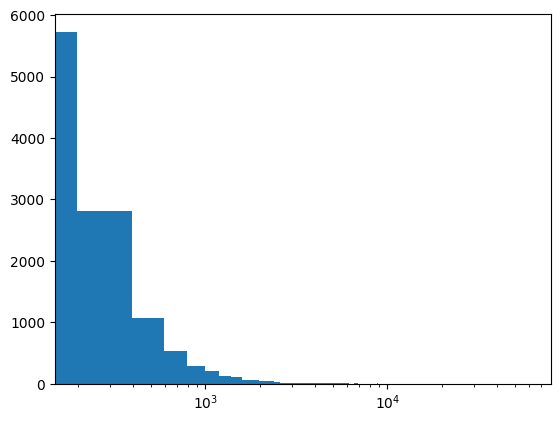

In [59]:
import matplotlib.pyplot as plt

hist, bins, _ = plt.hist(lengths_of_sentences, bins=300)
logbins = np.logspace(np.log(bins[0]),np.log(bins[-1]),len(bins))
plt.hist(lengths_of_sentences, bins=logbins)
plt.xscale('log')
plt.show()

In [35]:
w2vdataset = W2V_UITestsDataset()
Y_train, X_train, Y_val, X_val = w2vdataset.get_input_train_val()

100%|██████████| 3380/3380 [00:08<00:00, 421.64it/s]


In [36]:
w2vdataset.w2v_model.save(f"saved_data/models/word2vec_min-count=5_vector-size=500_window=500_epochs=50.model")
# w2vdataset.w2v_model.save(f"saved_data/models/word2vec_min-count=3_vector-size=1500_window=1000_epochs=15.model")

In [399]:
from src.params import PATH_PARSED_CLASSIFUI, PATH_PARSED_CLASSIFUI_GENERALIZED

w2vdataset_1 = W2V_UITestsDataset(tests_ui_folder=PATH_PARSED_CLASSIFUI)
w2vdataset_2 = W2V_UITestsDataset(tests_ui_folder=PATH_PARSED_CLASSIFUI_GENERALIZED)
Y_train, X_train_1, Y_val, X_val_1 = w2vdataset_1.get_input_train_val()
# Y_train, X_train_2, Y_val, X_val_2 = w2vdataset_2.get_input_train_val()

100%|██████████| 3436/3436 [00:07<00:00, 443.62it/s]


In [401]:
X_train_2, X_val_2 = [], []

def get_YX(mode='train'):
    if mode == 'train':
        idxs = w2vdataset_1.train_idxs
    elif mode == 'val':
        idxs = w2vdataset_1.val_idxs

    X = []
    for index in tqdm(idxs):
        sample = w2vdataset_2[index]
        vectorized_text = w2vdataset_2.encode_sentence(sample[0])
        X.append(vectorized_text)
    return X

X_train_2 = get_YX('train')
X_val_2   = get_YX('val')

100%|██████████| 3436/3436 [00:05<00:00, 659.60it/s]


In [402]:
len(Y_train), len(X_train_1), len(X_train_2)

(7891, 7891, 7891)

In [414]:
X_train = []
for i in range(len(X_train_1)):
    X_train.append(np.hstack((X_train_1[i], X_train_2[i])))

X_val = []
for i in range(len(X_val_1)):
    X_val.append(np.hstack((X_val_1[i], X_val_2[i])))

In [532]:
len(Y_train), len(X_train), len(Y_val), len(X_val)

(0, 0, 0, 0)

In [77]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression()

In [78]:
# Evaluate the model
Y_pred = clf.predict(X_val)
print('Accuracy:', accuracy_score(Y_val, Y_pred))

Accuracy: 0.13816568047337277


In [75]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [76]:
# Evaluate the model
Y_pred = clf.predict(X_val)
print('Accuracy:', accuracy_score(Y_val, Y_pred))

Accuracy: 0.19230769230769232


In [1]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# gnb = GaussianNB()
gnb = BernoulliNB()
gnb.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [80]:
# Evaluate the model
from sklearn.metrics import accuracy_score
Y_pred = gnb.predict(X_val)
print('Accuracy:', accuracy_score(Y_val, Y_pred))

Accuracy: 0.11775147928994083


In [ ]:
from liblinear.liblinearutil import (
    problem, parameter, train, predict, evaluations, save_model
)

# training
prob  = problem(Y_train, X_train)

In [ ]:
param = parameter('-s 5') #  '-s 5'
model = train(prob, param)

........*..........**
optimization finished, #iter = 183
Objective value = 126.229087
#nonzeros/#features = 11/1500
...........*...........*...**
optimization finished, #iter = 256
Objective value = 105.654480
#nonzeros/#features = 9/1500
...........*.........*......**
optimization finished, #iter = 265
Objective value = 126.657916
#nonzeros/#features = 11/1500
......*.......*........**
optimization finished, #iter = 218
Objective value = 153.604712
#nonzeros/#features = 12/1500
..........*...............*........*....*
optimization finished, #iter = 375
Objective value = 1218.521576
#nonzeros/#features = 45/1500
.........*.......*...*
optimization finished, #iter = 193
Objective value = 118.071193
#nonzeros/#features = 12/1500
........*........*.*
optimization finished, #iter = 174
Objective value = 116.596716
#nonzeros/#features = 9/1500
...........*........*.....*.
optimization finished, #iter = 250
Objective value = 123.232484
#nonzeros/#features = 11/1500
........*.......*........

In [ ]:
# evaluation
predicted_labels, _, _ = predict(Y_val, X_val, model)  # predicted_labels, accuracy, p_values
logging.info(f"Validation labels are predicted.")

(accuracy, mse, sq_corr_coef) = evaluations(Y_val, predicted_labels)
logging.info(f"{accuracy=} {mse=} {sq_corr_coef=}")

2023-08-15 15:45:02,612 - root - INFO - Validation labels are predicted.
2023-08-15 15:45:02,613 - root - INFO - accuracy=31.59722222222222 mse=10554.20630787037 sq_corr_coef=0.0954502341421206


Accuracy = 31.5972% (1092/3456) (classification)


In [423]:
model

In [426]:
len(X_train)

7891

1500

In [512]:
# idxs = np.random.choice(len(X_train), replace=False, size=1000)

# vis_X = np.array([X_train[i] for i in idxs])
# vis_Y = np.array([Y_train[i] for i in idxs])

idxs = np.random.choice(len(X_val), replace=False, size=1000)

vis_X = np.array([X_val[i] for i in idxs])
vis_Y = np.array([Y_val[i] for i in idxs])
vis_pred = np.array([predicted_labels[i] for i in idxs])

In [516]:
from sklearn.manifold import TSNE
import umap

# xy = TSNE(n_components=2, perplexity=30).fit_transform(vis_X)
xy = umap.UMAP(n_neighbors=6).fit_transform(vis_X)

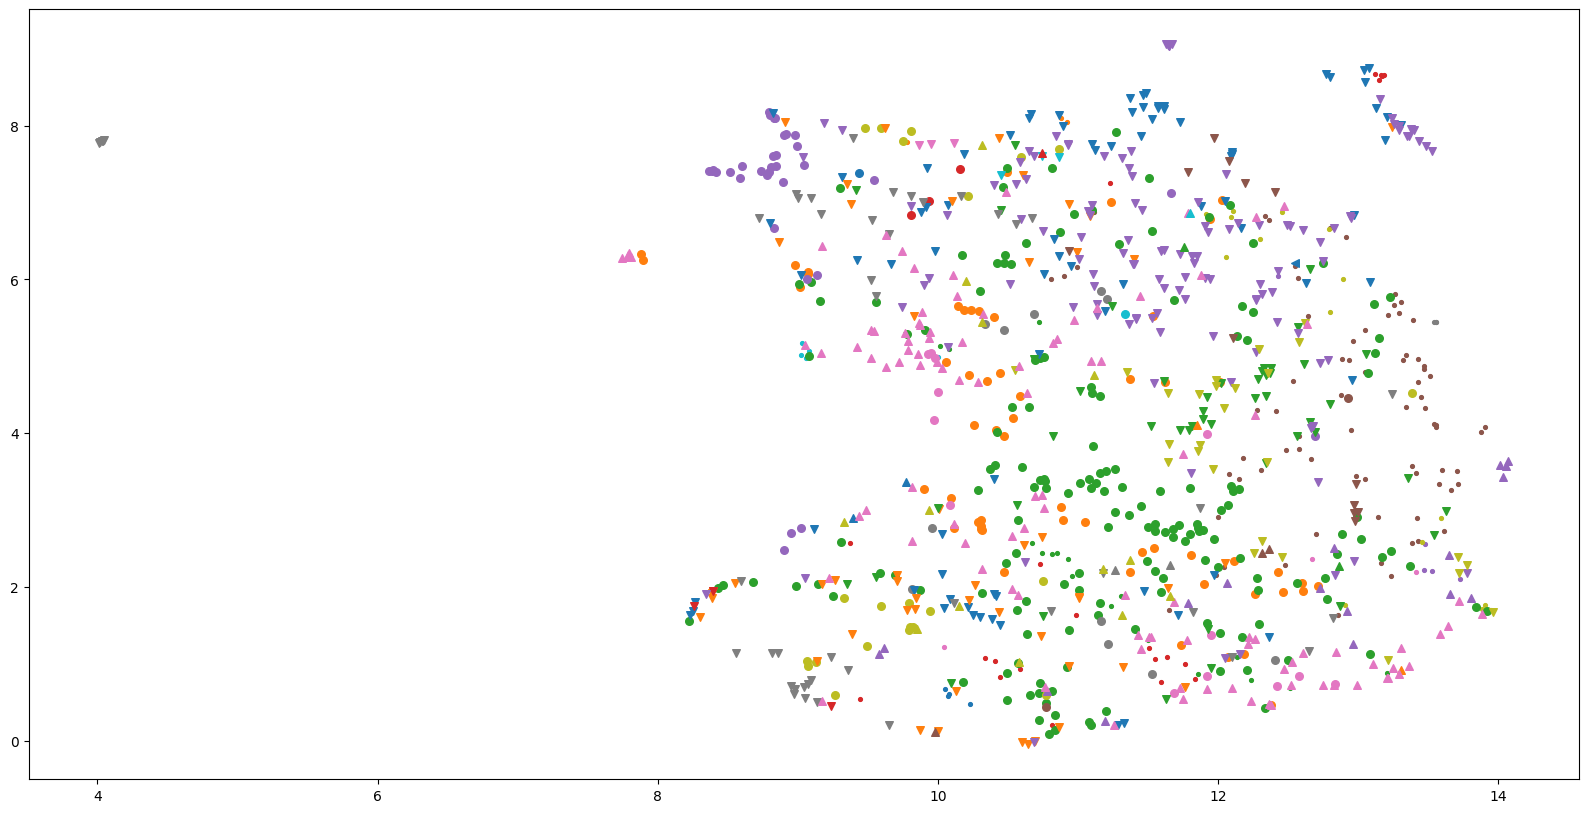

In [517]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import cycle

markers = cycle(Line2D.filled_markers)

plt.figure(figsize=(20, 10))
for i, Y in enumerate(np.unique(vis_pred)):
# for i, Y in enumerate(np.unique(vis_Y)):

    if i % 10 == 0:
        marker = next(markers)

    # plt.scatter(xy[Y == vis_Y][:, 0], xy[Y == vis_Y][:, 1], label=f'{Y}', s=30, marker=marker)
    plt.scatter(xy[Y == vis_pred][:, 0], xy[Y == vis_pred][:, 1], label=f'{Y}', s=30, marker=marker)

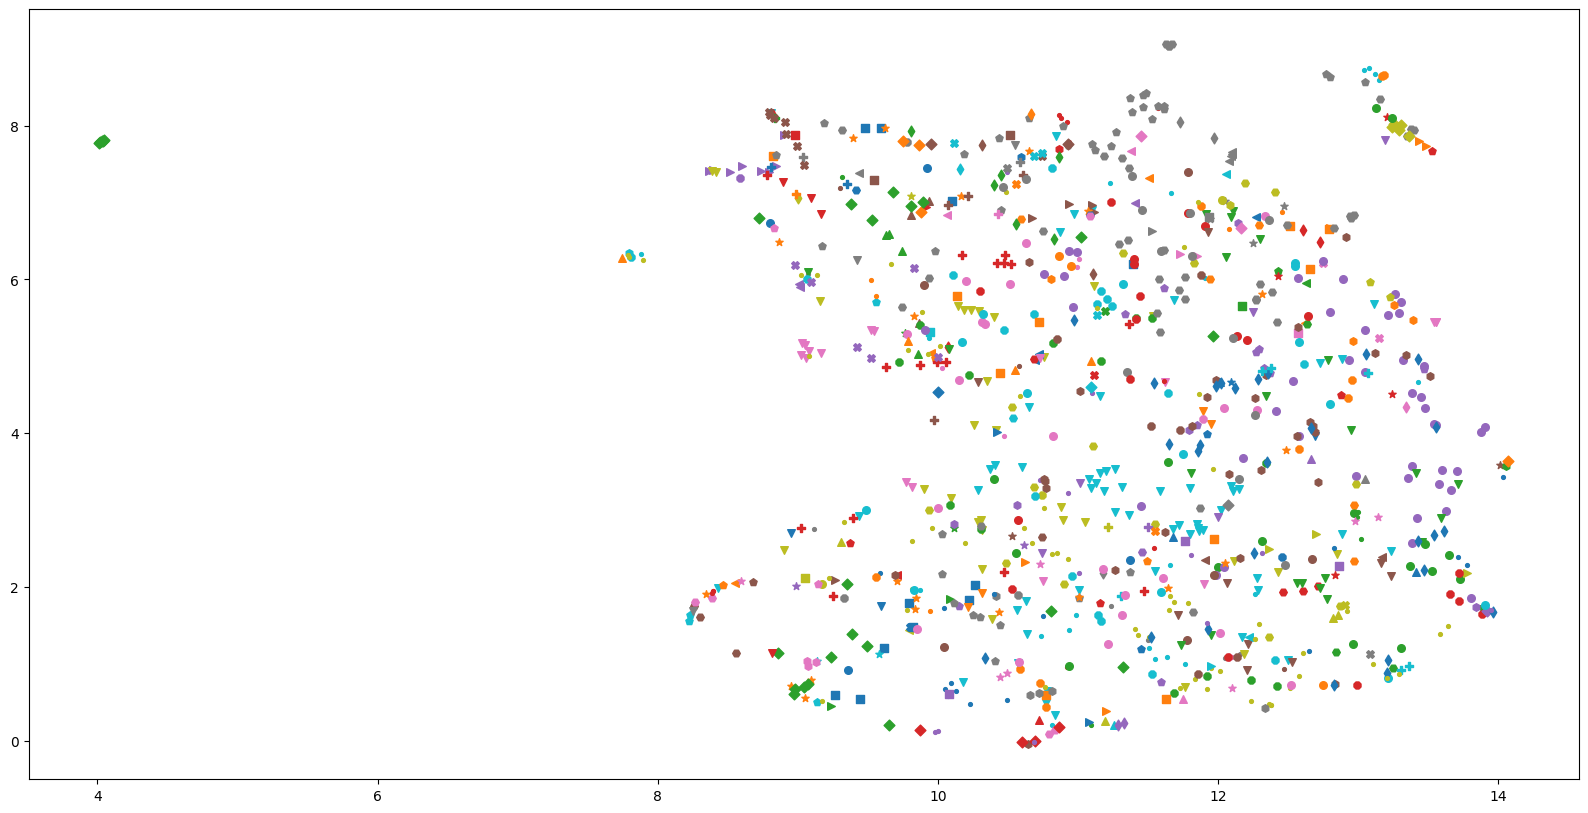

In [518]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import cycle

markers = cycle(Line2D.filled_markers)

plt.figure(figsize=(20, 10))
# for i, Y in enumerate(np.unique(vis_pred)):
for i, Y in enumerate(np.unique(vis_Y)):

    if i % 10 == 0:
        marker = next(markers)

    plt.scatter(xy[Y == vis_Y][:, 0], xy[Y == vis_Y][:, 1], label=f'{Y}', s=30, marker=marker)
    # plt.scatter(xy[Y == vis_pred][:, 0], xy[Y == vis_pred][:, 1], label=f'{Y}', s=30, marker=marker)